In [2]:
%pip install -qU PyMuPDF pillow langchain-groq "langchain-unstructured[local]" langchain-huggingface matplotlib langchain-community faiss-cpu

In [3]:
import getpass
import os

os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_API_KEY"] = getpass.getpass()

··········


In [4]:
!apt-get install poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.5 [186 kB]
Fetched 186 kB in 1s (317 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124565 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.5_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.5) ...
Setting up poppler-utils (22.02.0-2ubuntu0.5) ...
Processing triggers for man-db (2.10.2-1) ...


In [5]:
!apt-get install tesseract-ocr
!apt-get install libtesseract-dev

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,293 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124595 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [6]:
# Install the necessary python package
!pip install pytesseract

In [7]:

file_path = (
    "/content/Towards Privacy-Aware Sign Language Translation at Scale.pdf"
)


In [8]:
from langchain_unstructured import UnstructuredLoader

loader = UnstructuredLoader(
    file_path=file_path,
    strategy="hi_res"
)
docs = []
for doc in loader.lazy_load():
    docs.append(doc)


yolox_l0.05.onnx:   0%|          | 0.00/217M [00:00<?, ?B/s]

In [9]:
first_page_docs = [doc for doc in docs if doc.metadata.get("page_number") == 1]
for doc in first_page_docs:
    print(doc.page_content)

4
2024
2
0
2 g u A 7 ] L C . s c [ 2 v 1 1 6 9 0 . 2 0 4 2
:
v
arXiv
i
X
r
a
Towards Privacy-Aware Sign Language Translation at Scale
Phillip Rust
♥,†
Bowen Shi
Necati Cihan Camg¨oz
♦
♢
♢♣
Wang°*
Skyler Wang
♢,‡
Jean Maillard
♥
University of Copenhagen ♢ FAIR at Meta ♦ Meta ♣ UC Berkeley † p.rust@di.ku.dk ‡ jeanm@meta.com
Abstract
A major impediment to the advancement of sign language translation (SLT) is data scarcity. Much of the sign language data cur- rently available on the web cannot be used for training supervised models due to the lack of aligned captions. Furthermore, scaling SLT using large-scale web-scraped datasets bears privacy risks due to the presence of biometric information, which the responsible development of SLT technologies should ac- count for. In this work, we propose a two- stage framework for privacy-aware SLT at scale that addresses both of these issues. We introduce SSVP-SLT, which leverages self- supervised video pretraining on anonymized and unannotated vid

In [10]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

text_splitter = RecursiveCharacterTextSplitter(
    chunk_size=500, chunk_overlap=100, add_start_index=True
)
all_splits = text_splitter.split_documents(docs)

len(all_splits)

357

In [11]:
from langchain_huggingface import HuggingFaceEmbeddings

embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-mpnet-base-v2")

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [12]:
vector_1 = embeddings.embed_query(all_splits[0].page_content)
vector_2 = embeddings.embed_query(all_splits[1].page_content)

assert len(vector_1) == len(vector_2)
print(f"Generated vectors of length {len(vector_1)}\n")
print(vector_1[:10])

Generated vectors of length 768

[0.03711357340216637, 0.003038011258468032, -0.011712507344782352, 0.030448229983448982, -0.040789563208818436, -0.03128209710121155, 0.024803809821605682, -0.01476825587451458, -0.017117183655500412, -0.00451223598793149]


In [13]:
import faiss
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_community.vectorstores import FAISS

index = faiss.IndexFlatL2(len(vector_1))

vector_store = FAISS(
    embedding_function=embeddings,
    index=index,
    docstore=InMemoryDocstore(),
    index_to_docstore_id={},
)

In [14]:
from uuid import uuid4
uuids = [str(uuid4()) for _ in range(len(all_splits))]

vector_store.add_documents(documents=all_splits, ids=uuids)

['83eef8ed-2696-4f0e-bf2f-6db5bbccdc44',
 'a73d762a-11f6-4d4d-93ff-43e451a110dc',
 'd876ba99-9c46-404a-8025-5f96ebd2c41e',
 '285dfec4-9d95-4877-b462-18f3a7bf2b59',
 'b174b196-d3c3-4843-992e-cee227b797e2',
 '365df509-6fc8-48df-9881-d7ac877e9e6b',
 '01e65d4b-5a2a-45af-be6f-87ed9f6a482c',
 'adc83e49-e1af-4b78-af41-e1d650b5e7b6',
 '0276924a-274d-4341-9172-9c8c573dd036',
 'e8893cf4-7ab4-42fd-97b6-3e82c1434a97',
 'db9aadfa-5266-4b6c-b998-d7e494bc0a36',
 '54c4bce8-9ace-4965-bfcd-16a0e95b9e62',
 '7f7f17f9-be18-436c-a24f-918f4df5e212',
 '4a1b4f7a-024b-44bb-8ab0-624621c2f4c2',
 '0d34addf-72be-4b4d-b3c4-33d8a841afb7',
 'fc76d63b-f8e2-47c2-8821-38d25e204022',
 'ee7655d3-b18a-4338-bf83-2bb1011e7234',
 'f7b56957-8f60-4de4-a507-4fce2276d102',
 '76c6050a-6a5c-4113-9d1b-05e40889b548',
 'dc94fdb5-9fb7-4ddf-ab2b-a6482b171e0b',
 '6a21d602-bfd4-4152-a72d-2ac12cc8bfa0',
 'de83eb89-72cd-4911-8a76-0e5921e9153a',
 'faaa9ff7-e9c5-4fd5-b077-b94d8d8452b9',
 '09b3a353-d49c-4986-b256-4d2091afcd1c',
 'a728f791-a281-

In [15]:
from langchain import hub

prompt = hub.pull("rlm/rag-prompt")

example_messages = prompt.invoke(
    {"context": "(context goes here)", "question": "(question goes here)"}
).to_messages()

assert len(example_messages) == 1
print(example_messages[0].content)

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: (question goes here) 
Context: (context goes here) 
Answer:


In [16]:
from langchain_core.documents import Document
from typing_extensions import List, TypedDict


class State(TypedDict):
    question: str
    context: List[Document]
    answer: str

In [17]:
import getpass
import os

if not os.environ.get("GROQ_API_KEY"):
  os.environ["GROQ_API_KEY"] = getpass.getpass("Enter API key for Groq: ")

from langchain_groq import ChatGroq

llm = ChatGroq(model="llama3-8b-8192")

Enter API key for Groq: ··········


In [18]:
import getpass
import os

os.environ["TAVILY_API_KEY"] = getpass.getpass()

··········


In [19]:
from langchain_community.tools.tavily_search import TavilySearchResults

search = TavilySearchResults(max_results=2)
# If we want, we can create other tools.
# Once we have all the tools we want, we can put them in a list that we will reference later.
tools = [search]

In [20]:
%pip install langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.2/138.2 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.8 MB/s eta 0:00:00


In [21]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.prebuilt import create_react_agent

memory = MemorySaver()

agent_executor = create_react_agent(llm, tools,checkpointer=memory)

config = {"configurable": {"thread_id": "pkg123"}}

In [22]:
from langchain_core.messages import HumanMessage

In [23]:
def retrieve(state: State):
    retrieved_docs = vector_store.similarity_search(state["question"])
    return {"context": retrieved_docs}



In [29]:
from langchain.schema import HumanMessage, AIMessage
def generate(state: State):
    docs_content = "\n\n".join(doc.page_content for doc in state["context"])
    messages = prompt.invoke({"question": state["question"], "context": docs_content}).to_messages()
    response = agent_executor.invoke({"messages": [HumanMessage(content=messages[0].content)]})
    print(messages[0].content)
    state["answer"] = response["messages"][-1].content
    return state


In [30]:
from langgraph.graph import START, StateGraph

graph_builder = StateGraph(State).add_sequence([retrieve, generate])
graph_builder.add_edge(START, "retrieve")
graph = graph_builder.compile()

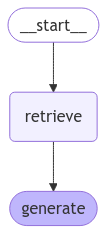

In [31]:
from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [32]:
result = graph.invoke({"question": "What are glosses in SLT?"},config)
#print(f'RESULT: {result}')
#print(f'Context: {result["context"]}\n\n')
print(f'Answer: {result["answer"]}')

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: What are glosses in SLT? 
Context: However, glosses are also considered an incom- plete and inaccurate representation of sign lan- guage (Camg¨oz et al., 2020; M¨uller et al., 2023). Furthermore gloss annotation is a labour intensive task. Due to these constraints, there is a growing body of research on gloss-free SLT. Most such ap- proaches incorporate techniques aimed at reduc- ing the modality gap, such as training the visual encoder via sign spotting (Tarr´es et al., 2023; Shi et al., 2022),4 adding inductive bias in the

Gloss-free SLT Glosses are a way of represent- ing individual signs into a written form. Being monotonically aligned to signs, they can be a use- ful medium between sign and spoken languages. Most SLT approaches to date 

In [33]:
for step in graph.stream(
    {"question": "What are glosses?"}, stream_mode="updates"
):
    print(f"{step}\n\n----------------\n")

{'retrieve': {'context': [Document(id='ef280228-241b-4662-88c0-fdf691d0e3f8', metadata={'source': '/content/Towards Privacy-Aware Sign Language Translation at Scale.pdf', 'detection_class_prob': 0.9394157528877258, 'coordinates': {'points': ((847.8040161132812, 283.30654749999803), (847.8040161132812, 953.4318252777745), (1466.477294921875, 953.4318252777745), (1466.477294921875, 283.30654749999803)), 'system': 'PixelSpace', 'layout_width': 1654, 'layout_height': 2339}, 'last_modified': '2025-01-16T08:47:10', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 2, 'parent_id': 'afba1cfa3dc5ca04d46168e7e5592385', 'file_directory': '/content', 'filename': 'Towards Privacy-Aware Sign Language Translation at Scale.pdf', 'category': 'NarrativeText', 'element_id': '47a32bff0c3985ab871628fc45b5bd1f', 'start_index': 0}, page_content='However, glosses are also considered an incom- plete and inaccurate representation of sign lan- guage (Camg¨oz et al., 2020; M¨uller et al., 2023).